# CSMA/CD vs CSMA/CA

Carrier Sense Multiple Access 
- Collission Detection
- Collission Access

## CSMA
Carrier Sense Multiple Access (CSMA) is a media access control technique used in shared-medium networks (like Ethernet and Wi-Fi).
It ensures that only one device transmits at a time to reduce collisions.

- **Carrier Sense:** This is the principle of "listen before you talk." A station (or node) on the network will first "sense" the communication channel (the medium, like a wire) to check if it's idle (i.e., if no one else is transmitting).

- **Multiple Access:** This simply means that multiple stations are connected to and share the same medium.

---

## Problem with CSMA:
Even if we apply Carrier Sense (CSMA) — i.e., “listen before you talk” — collisions can still occur due to propagation delay ($T_p$).

> **Propagation delay =** time taken for a signal to reach from one end of the medium to another.

## The Collision Scenario :

- At time $t_1$, Station A senses the medium. It's idle. Station B begins sending its frame.

- At time $t_2$ (where $t_2$ is just slightly later than $t_1$, but $t_2 - t_1 < T_p$), Station C senses the medium.

- Because of propagation delay, the first bit from Station B has not yet reached Station C. So, Station C also thinks the medium is idle and begins sending its frame.

- Collision: Somewhere in the medium between B and C, the two signals collide and are destroyed.


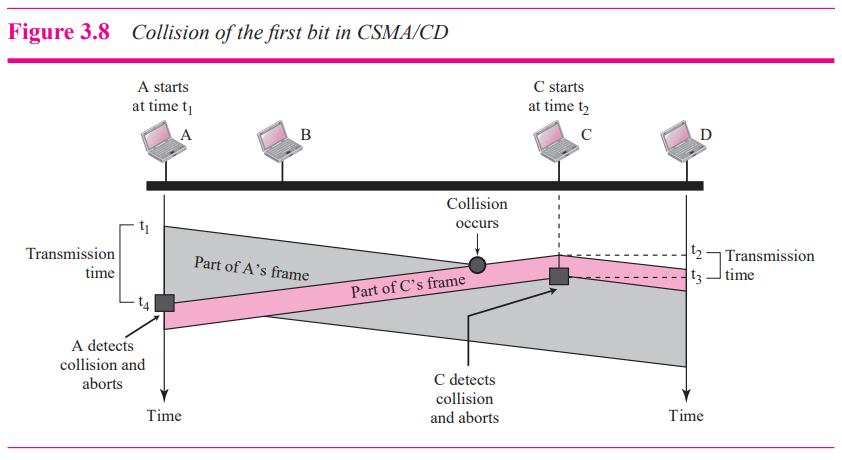

> This "vulnerability window" is equal to the propagation delay. This is why CSMA alone is not enough. CSMA/CD and CSMA/CA are the two main "upgrades" to handle this problem.

---

## Main difference:

- CSMA/CD is commonly used in wired networks and deals with collisions after they happen

- CSMA/CA is used in wireless networks and focuses on preventing collisions before they occur

> **Note:** CSMA/CA is effective before collission whereas, CSMA/CD is effective after collission

> **Note:** CSMA/CA is proactive. CSMA/CD is Reactive

---

## CSMA/CD

- Carrier Sense Multiple Access with Collision Detection 

- Standard: IEEE 802.3 (Wired Ethernet) 

- Strategy: Reactive. It lets collisions happen but provides a mechanism to detect them and recover.


## CSMA/CD Process

This is a "listen-before-you-talk, and-listen-while-you-talk" method.

1. **Sense:** Station A wants to send. It senses the medium.

2. **Wait (if busy):** If the medium is busy, it waits.

3. **Transmit (if idle):** If the medium is idle, it begins transmitting its frame.

4. **MONITOR (The "CD" part):** While transmitting, Station A simultaneously monitors the medium. It compares the signal it's transmitting with the signal it's receiving.

    - If ``Transmitted Signal == Received Signal:`` Everything is fine. It continues transmitting the entire frame.

    - If ``Transmitted Signal != Received Signal:`` The received signal has unexpected, higher energy. This means a collision has been detected.

5. **Collision Detected! (Recovery):**

    1. **Abort:** The station immediately stops transmitting its data frame.

    2. **Jam Signal:** The station transmits a 32-bit "Jam Signal." This is a strong signal that ensures all other stations on the network (especially the other colliding station) are aware that a collision has occurred, forcing them to also abort.

    3. **Backoff:** The station invokes the Binary Exponential Backoff (BEB) algorithm. It waits for a random amount of time before returning to step 1 (Sense). The range of this random wait time doubles after each subsequent collision to reduce the chance of another collision.

---

## Minimum Frame Size (imp)

To detect a collision before finishing transmission, the frame transmission time (Tfr) must be ≥ 2 × maximum propagation delay (Tp).

$T_{fr} \ge 2 \times T_p$

where:

- $T_{fr}$ = Frame Transmission Time (the time it takes to send the entire frame)
- $T_p$ = Maximum Propagation Delay (the time for a signal to cross the entire network)
- $2T_p$ = Round-trip time, also called Slot Time.

Why? 

Worst-case scenario:

- Two stations at opposite ends of the cable collide.

- The signal from A takes Tp to reach B.

- Collision takes another Tp to reflect back to A.

- So A must still be transmitting after 2Tp to detect it.

Therefore: $T_{fr} \ge 2 \times T_p$

#### **Formula for minimum frame size:** 

> As we know that, Speed = Distance / Time.


- $T_{fr} = \text{Frame Size (bits)} / \text{Bit Rate (bps)}$
- So, $(\text{Minimum Frame Size}) / \text{Bit Rate} \ge 2T_p$
- $\text{Minimum Frame Size} = 2 \times T_p \times \text{Bit Rate}$

---

## CSMA/CA

- **Full Name:** Carrier Sense Multiple Access with Collision Avoidance 
- **Standard:** IEEE 802.11 (Wireless LAN / Wi-Fi) 
- **Strategy:** Proactive. It assumes collisions are likely and cannot be detected, so it adds steps to prevent them from happening in the first place.

## Why wireless LAN cannot use CSMA/CD

1. **"Can't Listen While Shouting" Problem** : 
    - A wireless radio transmitter can’t transmit and sense at the same time.
    - In a wired network, a station can easily transmit and receive at the same time. In wireless, a radio transmitting a powerful signal on a specific frequency cannot simultaneously listen for a weak incoming signal on the same frequency.
    - Its own transmission would drown out everything else. This would require two separate radios and more bandwidth, making it expensive and complex.

2. **The Hidden Station Problem:** 
    - Imagine three stations: A, B, and C.
    - A can hear both B and C. However, A and C are too far apart to hear each other.
    - B senses the medium. It's idle (it can't hear C). A starts sending to B.
    - C senses the medium. It's idle (it can't hear A). C starts sending to B.
    - B collision occurs at A.
    - The Result: Both frames are destroyed. Worse, neither A nor C knows the collision happened because they are "hidden" from each other and cannot detect collisions at the receiver.

    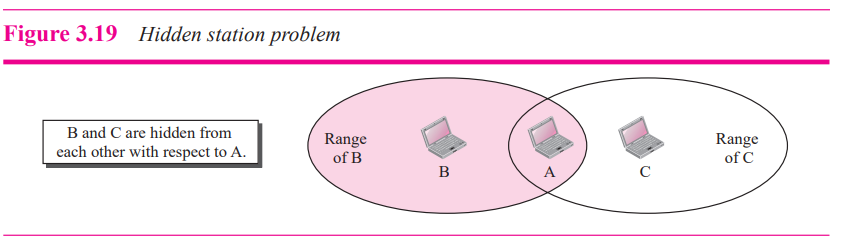

3. **Signal Fading:**
    - A collision might occur far away, but the resulting signal is so weak (faded) by the time it reaches the original sender that it's indistinguishable from background noise.

---

## CSMA/CA — Carrier Sense Multiple Access with Collision Avoidance

> Since collisions can’t be detected, CSMA/CA tries to avoid them before transmission starts.

## CSMA/CA Process (The "Handshake").

To avoid collisions, CSMA/CA uses a 
- "listen-before-you-talk", and
- "ask-for-permission" method. 

This involves several key components:

#### 1. Interframe Spaces (IFS): 
These are mandatory **"quiet time"** periods. Priority is determined by how short the IFS is.
    
- **DIFS (Distributed Interframe Space):** After the station is found to be idle, the station waits for a period of time called the distributed interframe space (DIFS); then the station sends a control frame called the request to send (RTS). 

- **SIFS (Short Interframe Space):** After receiving the RTS and waiting a period of time called the short interframe space (SIFS), the destination station sends a control frame, called the clear to send (CTS), to the source station. This control frame indicates that the destination station is ready to receive data. 


#### 2. **The 4-Way Handshake (RTS/CTS):** 
This is the process for a station (Source) to get permission to send data.

1. **Sense:** The Source senses the medium. If busy, it waits.
    
2. **Wait DIFS:** Once the medium is idle, it waits for one DIFS period.

3. **Send RTS:** It sends a Request to Send (RTS) control frame to the Destination (e.g., the Access Point). This frame is small and basically says, "I have data. How long I need the channel is X."

4. **Receive CTS:** The Destination waits one SIFS period (high priority) and then replies with a Clear to Send (CTS) frame. This frame says, "You are clear to send for duration X."

5. **Send Data:** The Source waits one SIFS period, then transmits its actual (large) Data frame.

6. **Receive ACK:** The Destination receives the data, waits one SIFS period, and sends an Acknowledgement (ACK) frame to confirm the data arrived uncorrupted.

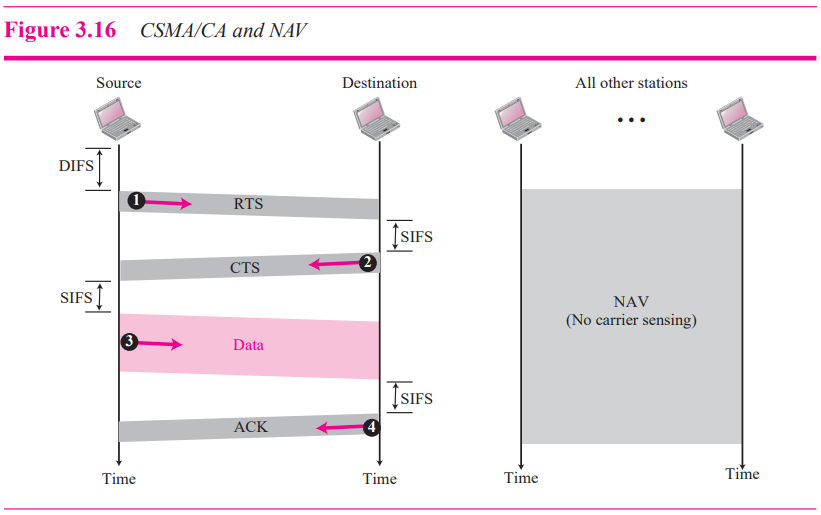

#### 3. **The NAV (Network Allocation Vector):** 
This is the "Collision Avoidance" magic. The NAV is a virtual carrier-sensing mechanism.

- How it Works: The RTS and CTS frames both contain a Duration field. This field states how long the entire transaction (Data + ACK) will take.

- The Rule: Any station that hears either the RTS or the CTS frame will:

    1. Read the Duration value.

    2. Set a timer, called its Network Allocation Vector (NAV), for that duration.

    3. This is the key: The station is not allowed to even sense the medium until its NAV timer counts down to zero.

How NAV Solves the Hidden Station Problem: Let's go back to our A-B-C scenario.

1. Station A (hidden from C) sends an RTS to B.

2. Station B (the Access Point) replies with a CTS.

3. Station C (hidden from A) cannot hear the RTS. However, it can hear the CTS from the Access Point.

4. Station C reads the Duration field in the CTS frame and sets its NAV.

5. Result: Station C will now "go to sleep" for the entire duration of A's transmission, even though it cannot hear A directly. It has been virtually told to stay quiet, and a collision at B is successfully avoided.

#### 4. Fragementation

- Problem: Wireless environments are "noisy" (high bit error rate). A single-bit error in a very large frame will corrupt the entire frame.

- Inefficiency: This would require re-transmitting the entire large frame, wasting a lot of time and bandwidth.

- Solution (Fragmentation): The protocol allows a large frame to be broken into smaller "fragments." Each small fragment is sent using its own SIFS-Data-SIFS-ACK exchange.

- Benefit: If one small fragment gets corrupted, only that small fragment needs to be re-sent, not the entire original packet. This is much more efficient in a noisy environment.

DIfference berweeen Hidden and exposed statin problem..

how to avoid hidden station problem..  and exposed station problem 
- Handshaking rts/cts

Piconet vs Scatternet

---

## Ques.

Discuss how hidden and exposed terminal problems impact CSMA/CA performance. Further, discuss the
techniques such as RTS/CTS handshaking, Network Allocation Vector (NAV), and backoff mechanisms
to enhance overall throughput efticiency. 

## Answer:



### The Hidden Terminal Problem (Causes Collisions) 💥

This is the most severe problem for CSMA/CA. It occurs when two stations can both "see" (are in range of) a central Access Point (AP) but cannot see each other.

* **Scenario:**
    * **Station A** and **Station C** are on opposite sides of an AP.
    * An obstacle or distance prevents A and C from hearing each other's signals.
    * Both A and C can hear and be heard by the **AP (B)**.
    
* **The Problem in Action:**
    1.  **Station A** "listens" (senses the carrier). It hears nothing (it's "hidden" from C), so it assumes the channel is free.
    2.  Station A begins transmitting its data frame to the AP.
    3.  At nearly the same time, **Station C** also "listens." It also hears nothing (it's "hidden" from A), so it *also* assumes the channel is free.
    4.  Station C begins transmitting its data frame to the AP.
* **Performance Impact:**
    * **Collision:** A **collision** occurs *at the receiver* (the AP). The AP receives two garbled, unusable frames.
    * **No Detection:** Unlike in wired networks, the senders (A and C) *cannot* detect this collision. They continue to transmit their entire, long data frames, completely wasting the medium for that duration.
    * **Retransmission:** Both A and C will only realize the failure when they do not receive an **Acknowledgement (ACK)** from the AP. After a long timeout period, both stations will assume the frame was lost and must re-initiate the *entire* transmission process (including the backoff mechanism).
    * **Throughput Collapse:** This cycle of collisions, wasted time, and retransmissions can cause the network's **overall throughput to collapse**, especially in a busy environment.

### The Exposed Terminal Problem (Causes Unnecessary Delay) ⏳

This is the opposite problem. It doesn't cause collisions but leads to **channel under-utilization** and reduced efficiency.

* **Scenario:**
    * Four stations are in a line: **A-B-C-D**.
    * **Station B** is transmitting to **Station A**.
    * **Station C** is in range of B (and D) but *not* in range of A.
    * Station C wants to transmit to **Station D**.
    
* **The Problem in Action:**
    1.  **Station B** is actively sending a large data frame to **Station A**.
    2.  **Station C** wants to send data to **Station D**.
    3.  **Station C** "listens" (senses the carrier). It *hears* Station B's transmission (because C is "exposed" to B's signal).
    4.  **Station C** *falsely* concludes the channel is busy and **defers** (waits), even though its transmission to D would *not* interfere with A's reception (since A is out of C's range).
* **Performance Impact:**
    * **Wasted Opportunity:** Station C is being "overly polite." The channel resource is **under-utilized** because a non-interfering transmission (C-to-D) is blocked.
    * **Reduced Throughput:** This unnecessary delay reduces the potential for parallel transmissions in the network, lowering the **overall throughput efficiency**.


## 2. Techniques to Enhance Throughput Efficiency

To combat these problems, CSMA/CA is enhanced with several mechanisms.

### RTS/CTS Handshaking

The **Request to Send (RTS) / Clear to Send (CTS)** handshake is an optional mechanism (typically used for large data frames) that directly solves both the hidden and exposed terminal problems. It's a "reservation" system.

* **How it Works (4-Way Handshake):**
    1.  **RTS:** The sender (e.g., Station A) sends a very small **Request to Send** frame to the AP. This frame says, "I have data, I need the channel."
    2.  **CTS:** The AP (the receiver) broadcasts a small **Clear to Send** frame to *everyone* in its range. This frame says, "Everyone be quiet, I am about to listen to Station A."
    3.  **DATA:** Station A, upon receiving the CTS, sends its large data frame.
    4.  **ACK:** The AP, upon successful receipt, sends a small **Acknowledgement** to Station A.

* **How it Enhances Throughput:**
    * **Solves Hidden Terminal:** In the A-B-C scenario, hidden **Station C** may not hear A's **RTS**, but it *will* hear the **CTS** from the central AP. This CTS acts as an explicit "STOP" sign, forcing Station C to wait and **preventing the collision**. This avoids the retransmission cycle and saves throughput.
    * **Solves Exposed Terminal:** In the A-B-C-D scenario, **Station C** (exposed) hears B's **RTS**, but it *does not* hear A's **CTS** (since it's out of A's range). The rule is: if a station hears an RTS but not the corresponding CTS, it knows it's an exposed terminal and is free to transmit. This **allows the parallel C-to-D transmission**, improving channel utilization.

### Network Allocation Vector (NAV)

The **Network Allocation Vector (NAV)** is the *mechanism* that enforces the RTS/CTS handshake. It is a "virtual carrier sense."

* **How it Works:**
    * The **RTS** and **CTS** frames both contain a **Duration** field. This field states the *exact time* (in microseconds) needed for the *entire* transaction (i.e., the Data frame + the final ACK).
    * Any station that overhears *either* the RTS or the CTS frame reads this `Duration` value and sets a local timer called its **NAV**.
    * While a station's NAV is counting down, it is **forbidden from attempting to access the channel**, even if its physical carrier sense "listens" and hears nothing. It *knows* the medium is reserved.
* **How it Enhances Throughput:**
    * The NAV acts as a "Do Not Disturb" sign for the entire network.
    * For the hidden terminal (Station C), hearing the AP's **CTS** sets its **NAV**, forcing it to remain silent and **avoiding the collision**.
    * This virtual sensing is more reliable than physical sensing, as it reserves the channel *before* the large, high-value data frame is sent. This drastically reduces the chance of collisions on data frames, which are the most expensive to retransmit, thereby maximizing throughput.

### Backoff Mechanisms

The **Backoff Mechanism** is the fundamental, probabilistic method CSMA/CA uses to avoid collisions *before* they even happen, especially when multiple stations try to transmit at once.

* **How it Works:**
    1.  **Sense Channel:** A station senses the channel.
    2.  **Wait DIFS:** If the channel is idle, it must *first* wait for a fixed period called the **DIFS (Distributed Interframe Space)**.
    3.  **Set Random Timer:** After DIFS, it does *not* transmit immediately. It picks a *random* number from a range called the **Contention Window (CW)** (e.g., a random number between 0 and 15). This is its **backoff timer**.
    4.  **Countdown:** The station "listens" to the channel for idle time slots. For every idle slot it senses, it decrements its timer.
    5.  **Transmit:** When the timer reaches zero, the station transmits (e.g., sends its RTS or Data).
    6.  **Pause:** If the station hears another station transmit *while* it is counting down, it **pauses its timer** and waits until that transmission is over before resuming its countdown.
    
* **How it Enhances Throughput:**
    * This random countdown **staggers transmissions**. If two stations (A and B) both finish waiting DIFS at the same time, it is highly unlikely they will pick the *same* random number.
    * The station that picks the smaller random number (e.g., A picks 5) will transmit first. The other station (e.g., B picks 12) will hear A's transmission, pause its timer, and wait, **avoiding a collision**.
    * By probabilistically "scheduling" transmissions, the backoff mechanism is the primary defense against collisions, ensuring the channel is used efficiently instead of being constantly deadlocked by retransmissions. This is the core of "Collision Avoidance" and is essential for maintaining high throughput.


---

## Ques.


explain why csma/cd is unsuitable for wireless network, specially addressing the issues related to signal propagation and collision detection in a shared medium. How does CSMA/CA address these challenges and what mechanisms are used to minimize collisions in wireless communication. 


## Answer:

CSMA/CD (Collision Detection) is fundamentally unsuitable for wireless networks due to the nature of radio-wave propagation and the practical impossibility of simultaneous transmission and reception. CSMA/CA (Collision Avoidance) was developed specifically to address these challenges.

Here’s a detailed breakdown.

---

## Why CSMA/CD Fails in Wireless Networks 📡

CSMA/CD, used in wired Ethernet, operates on a "listen while you talk" principle. A station transmits and simultaneously listens to the wire. If the signal it "hears" doesn't match the signal it's "sending," it knows a collision has occurred, stops, and sends a jam signal.

This fails in a wireless (RF) environment for two primary reasons:

### 1. Collision Detection is Impractical

In a wireless network, stations transmit and receive on the same frequency. A station's own outgoing transmission is *immensely* more powerful to its own receiver than any incoming signal.

* **The "Shouting" Problem:** This is like trying to listen for a faint whisper in a room *while you are simultaneously shouting at the top of your lungs*. Your own "shout" (transmission) will completely drown out the "whisper" (an incoming signal or a faint collision signal).
* **Cost and Complexity:** To make this work, a station would need two separate radios on different frequencies (one to send, one to listen), significantly increasing the cost and complexity of all devices. This is known as a **full-duplex** operation, which is not feasible for a shared-medium wireless LAN.

### 2. Signal Propagation Issues (The Hidden Station Problem) 💥

This is the most critical issue. In a wired network, a signal's strength is relatively consistent, and everyone on the shared bus "hears" everyone else. In a wireless network, signals are affected by distance, obstacles, and fading.

This leads to the **Hidden Station Problem**:

* **Scenario:** Imagine three stations: **A**, **B (an Access Point)**, and **C**.
* **Setup:** Station A and Station C are on opposite sides of the Access Point. They can both "hear" the AP (B), but they are too far apart (or blocked by a wall) to hear *each other*.
* **The Failure:**
    1.  Station A "listens" (senses the carrier). It hears nothing, as it's hidden from C. It assumes the channel is free and starts sending to B.
    2.  Station C *also* "listens." It hears nothing, as it's hidden from A. It *also* assumes the channel is free and starts sending to B.
    3.  A **collision** occurs *at the receiver* (B).
    4.  **Crucially, neither A nor C can detect this collision.** They can't hear each other's transmissions. They will both uselessly transmit their entire, long data packets, only to find out they failed when they don't receive an acknowledgment.

This single problem makes CSMA/CD completely ineffective, as collisions become undetectable and lead to massive bandwidth waste.



---

## How CSMA/CA Addresses These Challenges

Since CSMA/CA *cannot* detect collisions, its entire philosophy is **proactive** rather than reactive. It *assumes* collisions are a threat and employs mechanisms to *avoid* them before they happen.

Here are the key mechanisms it uses to minimize collisions:

### 1. Backoff Mechanisms (The "Polite Wait") 🤫

This is the primary avoidance technique. Even when a station senses the channel is idle, it does *not* transmit immediately.

* **DIFS (Distributed Interframe Space):** A station must first sense the channel is idle for a specific period called **DIFS**.
* **Contention Window (CW):** After DIFS, the station picks a *random* timer value from a "Contention Window."
* **Countdown:** The station continues to listen to the channel. For every idle time slot that passes, it decrements its timer. If it hears another station transmit, it *pauses* its timer.
* **Transmission:** When the timer hits zero, the station transmits.

**How it helps:** If two stations (A and C) both sense the channel is free, it's highly *unlikely* they will pick the exact same random backoff timer. The one that picks the smaller number will transmit first, and the other will "pause" and wait, thus **avoiding a collision**.

### 2. RTS/CTS Handshaking (The "Reservation")

This is an optional mechanism (typically for large data packets) that directly solves the Hidden Station Problem.

* **RTS (Request to Send):** The sending station (A) sends a very small **RTS** frame to the Access Point (B). This is like asking, "May I have permission to send?"
* **CTS (Clear to Send):** The Access Point (B) broadcasts a small **CTS** frame to *everyone* in its range. This frame says, "Everyone be quiet, I'm about to listen to A."

**How it helps:** The hidden station (C) may not have heard A's RTS, but it *will* hear the **CTS** from the Access Point. This CTS signal acts as an explicit "STOP" sign, forcing Station C to wait and **preventing the collision**.

### 3. Network Allocation Vector (NAV)

The NAV is the *enforcement* of the RTS/CTS handshake. It is a "virtual" carrier sense.

* **How it works:** The RTS and CTS frames both contain a **Duration** field that states how long the entire transmission will take.
* Any station that hears *either* the RTS or the CTS will set a timer, its **NAV**, for that duration.
* While a station's NAV is active, it is **forbidden from attempting to access the channel**, even if its physical senses tell it the channel is idle.

**How it helps:** This "Do Not Disturb" sign is more reliable than physical sensing and ensures the channel is reserved, solving the hidden station problem and protecting the large data frame from any interference.

### 4. Positive Acknowledgment (ACK) ✅

Because collisions are undetectable, CSMA/CA *must* have explicit confirmation of success.

* **How it works:** After a station successfully receives a data frame, it waits for a very short period (**SIFS**) and then sends back an **Acknowledgement (ACK)** frame.
* If the original sender does not receive an ACK, it **assumes a collision or error occurred** and will retransmit the frame (after going through the backoff process again). This replaces the "listen while talk" detection of CSMA/CD.

---

## Ques. 




Assume the ethenet LAN is configured with CSMA/CD using the bus topology. If the stations are using frames of size 500 bits and datarate offered by a cable is 50mbps. The signal speed inside the cable is 2,50,000 km/sec. The stations are connected uniformly with a spacing of 10mts between the adjacent ones. Calculate the maximum no of stations that can be connected? 

## Answer:

To find the maximum number of stations, we must use the fundamental constraint of a CSMA/CD network.

The rule is: **Transmission Time ($T_{fr}$) $\ge$ 2 $\times$ Maximum Propagation Time ($T_p$)**

This ensures that a station can detect a collision at the furthest end of the network *before* it finishes transmitting its frame. To find the maximum number of stations, we'll find the maximum allowed cable length using the equality:

**$T_{fr} = 2 \times T_p$**

---

### Given Values

* **Frame Size ($L$):** 500 bits
* **Data Rate ($B$):** 50 Mbps = $50 \times 10^6$ bits/sec
* **Signal Speed ($V$):** 2,50,000 km/sec = $2.5 \times 10^8$ m/sec
* **Spacing ($s$):** 10 m

---

### Step 1: Calculate Transmission Time ($T_{fr}$)

First, let's find the time it takes to send the frame.

* $T_{fr} = \text{Frame Size} / \text{Data Rate}$
* $T_{fr} = 500 \text{ bits} / (50 \times 10^6 \text{ bits/sec})$
* $T_{fr} = 10 \times 10^{-6} \text{ sec}$
* **$T_{fr} = 10 \text{ \textmu s}$ (10 microseconds)**

---

### Step 2: Set up the Main Equation

Now, we use the CSMA/CD constraint to find the maximum allowed propagation time ($T_p$).

* $T_{fr} = 2 \times T_p$
* $10 \text{ \textmu s} = 2 \times T_p$
* $T_p = 5 \text{ \textmu s}$
* **$T_p = 5 \times 10^{-6} \text{ sec}$**

---

### Step 3: Calculate Maximum Cable Length ($D_{\text{max}}$)

Propagation time is the time it takes for a signal to travel the full length of the cable. We can use this to find the maximum length.

* $T_p = D_{\text{max}} / \text{Signal Speed}$
* $D_{\text{max}} = T_p \times V$
* $D_{\text{max}} = (5 \times 10^{-6} \text{ sec}) \times (2.5 \times 10^8 \text{ m/sec})$
* $D_{\text{max}} = 12.5 \times 10^2 \text{ m}$
* **$D_{\text{max}} = 1250 \text{ meters}$**

The maximum length of the bus cable is 1250 meters.

---

### Step 4: Calculate Maximum Number of Stations ($N$)

The stations are connected with a 10-meter spacing. The total length of the cable is determined by the number of gaps between stations. For $N$ stations, there are $(N-1)$ gaps.

* $D_{\text{max}} = (N - 1) \times \text{Spacing}$
* $1250 \text{ m} = (N - 1) \times 10 \text{ m}$
* $N - 1 = 1250 / 10$
* $N - 1 = 125$
* $N = 126$

The maximum number of stations that can be connected is **126**.



## Ques
1. For an IPv4 datagram, the value of header length is 5, the value of total length is 600, the more fragment
bit (i.e. M) is set as 0, and the value of fragmentation offset is 200. Determine:

a) The position of the datagram (first, last, middle, etc.)

b) The sequence number of the first byte of the payload

c) The sequence number of the last byte of the payload 

## ANs

1. M = 0. So it is last datagram,,

2. Fragmentation offset = 200.

First byte = 200* 8 = 1600

3. Last byte = First byte  + payload size - 1

     = 1600 + (600-20) - 1 = 2179